# Prédiction des prix de l'immobilier à Boston dans les années 1970

La prédiction du prix de maisons bostoniennes des années 1970, dont les données sont issues de la base *Boston House Prices*, créée par D. Harrison et D.L. Rubinfeld à l'Université de Californie à Irvine (http://archive.ics.uci.edu/ml/machine-learning-databases/housing/), est un problème classique d'apprentissage supervisé.

<img src="https://1.bp.blogspot.com/-sCZIatDf9LQ/XGm-lEHXnAI/AAAAAAAAPxQ/kv8S8fdgudAwWTFuJhuAoiykLmWLCoOtgCLcBGAs/s1600/197010xx-GovernmentCenter-Boston_resize.JPG" width=600 />

Plus précisément, le label à prédire dans cette base de données est le prix médian par quartier de l'immobilier (en milliers de dollars). Il s'agit donc d'un problème de régression puisque l'on veut inférer des valeurs continues. Pour ce faire, on dispose de 13 entrées offrant les informations suivantes :

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
- AGE - proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centres
- TAX - full-value property-tax rate per \$10,000
- RAD - index of accessibility to radial highways
- PTRATIO - pupil-teacher ratio by town
- B $ = 1000(B_k - 0.63)^2$ where $B_k$ is the proportion of blacks by town
- LSTAT - percentage lower status of the population

L'objectif de ce TP est d'arriver à prédire au plus près les valeurs médianes de prix de maison par quartier.


![Texte alternatif…](https://miro.medium.com/max/763/1*i9vZk7NkS1dZz6JEcbV5nA.png)

In [63]:
from __future__ import print_function
import numpy as np
from matplotlib import pyplot as plt
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import regularizers

%matplotlib inline

##### _**Exercice** : Définir une fonction d'affichage `plot_loss` qui permet d'afficher erreur d'entraînement et de validation._

On pourra tracer les courbes associées aux erreurs d'entraînement/de validation par epoch. 

In [3]:
def plot_loss(val_loss, train_loss, ymax=100):
    plt.plot(val_loss, color='green', label='Erreur de validation')
    plt.plot(train_loss, color='blue', linestyle='--', label='Erreur d\'entraînement')
    plt.xlabel('Epochs')
    plt.ylim(0, ymax)
    plt.title('Évolution de la perte sur les ensembles d\'apprentissage et de validation au cours de l\'apprentissage')
    plt.legend()

In [ ]:
# %load solutions/plot_loss.py

## Préparation des données

On commence par charger les données d'entraînement et de test.

In [4]:
from tensorflow.keras.datasets import boston_housing
from sklearn.model_selection import train_test_split

In [5]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


## Approche simple à corriger

Nous allons commencer par créer un perceptron multicouche élementaire.

### Création du modèle

La fonction `Sequential` permet d'instancier un réseau de neuronnes, la fonction `add` permet d'ajouter une couche au réseau, enfin la fonction `Dense` correspond à un perceptron (monocouche).

In [13]:
model = Sequential()
model.add(Dense(4, activation='relu', input_dim=13))
model.add(Dense(1, activation='sigmoid'))

### Entrainement du réseau

La fonction `compile` permet de passer les arguments nécessaires à l'entraînement du réseau. `history` stocke les calculs de la loss pour chacune des epochs.

In [14]:
optim = optimizers.SGD(lr = 0.01)
model.compile(optimizer=optim, loss='mse', metrics=['mae'])

history = model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
13/13 [==============================] - 0s 1ms/step - loss: 542.3705 - mae: 21.3951
Epoch 2/50
13/13 [==============================] - 0s 1ms/step - loss: 542.3705 - mae: 21.3951
Epoch 3/50
13/13 [==============================] - 0s 1ms/step - loss: 542.3704 - mae: 21.3950
Epoch 4/50
13/13 [==============================] - 0s 1ms/step - loss: 542.3704 - mae: 21.3950
Epoch 5/50
13/13 [==============================] - 0s 1ms/step - loss: 542.3704 - mae: 21.3950
Epoch 6/50
13/13 [==============================] - 0s 1ms/step - loss: 542.3704 - mae: 21.3950
Epoch 7/50
13/13 [==============================] - 0s 1ms/step - loss: 542.3704 - mae: 21.3951
Epoch 8/50
13/13 [==============================] - 0s 1ms/step - loss: 542.3704 - mae: 21.3951
Epoch 9/50
13/13 [==============================] - 0s 1ms/step - loss: 542.3704 - mae: 21.3951
Epoch 10/50
13/13 [==============================] - 0s 1ms/step - loss: 542.3704 - mae: 21.3950
Epoch 11/50
13/13 [====================

### Evaluation du modèle

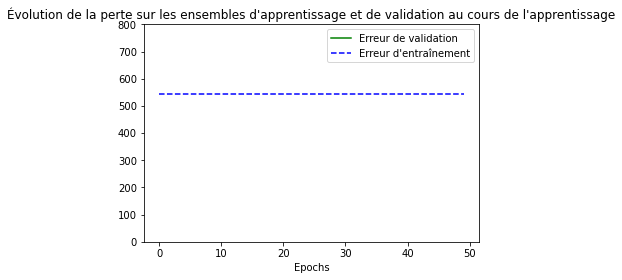

In [15]:
train_loss=(history.history['loss'])
plot_loss([], train_loss, ymax=800)

In [16]:
 model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 570.7011 - mae: 22.0784


[570.7011108398438, 22.078433990478516]

On obtient une mae d'environ 22, ce qui signie que l'on est éloigné en moyenne de 22000$ de la vérité terrain.

## Travail à faire

L'approche présentée ci-dessus apporte des résultats décevants, en raison de  quelques maladresses, voire erreurs. Dans un premier temps, vous devez **trouver et corriger ces problèmes**.

Dans un second temps, cherchez à améliorer les performances du modèle. Vous pouvez atteindre sans trop de difficulté un score de MAE inférieur à 3 sur l'ensemble de test. A chaque nouveau test, vous devez évaluer si votre réseau est en sous-apprentissage, ou en sur-apprentissage, et en déduire des modifications possibles pour en améliorer les performances.

MAE de test à battre si vous aimez les défis : **2.20** !

### Correction du modèle précédent

Vous penserez à évaluer votre modèle à l'aide de la fonction `plot_loss` définie précédement et de la fonction `evaluate`.

In [22]:
## A COMPLETER ##
model = Sequential()
model.add(Dense(4,activation='relu',input_dim=13))
model.add(Dense(1,activation='linear'))

optim = optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optim, loss = 'mse', metrics=['mae'])
history = model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
13/13 [==============================] - 0s 1ms/step - loss: 998.2704 - mae: 25.3035
Epoch 2/50
13/13 [==============================] - 0s 1ms/step - loss: 150.0701 - mae: 9.4216
Epoch 3/50
13/13 [==============================] - 0s 1ms/step - loss: 93.5663 - mae: 7.4834
Epoch 4/50
13/13 [==============================] - 0s 1ms/step - loss: 80.5899 - mae: 6.5046
Epoch 5/50
13/13 [==============================] - 0s 1ms/step - loss: 75.8765 - mae: 6.5609
Epoch 6/50
13/13 [==============================] - 0s 1ms/step - loss: 73.7141 - mae: 6.2379
Epoch 7/50
13/13 [==============================] - 0s 1ms/step - loss: 72.5511 - mae: 6.2011
Epoch 8/50
13/13 [==============================] - 0s 1ms/step - loss: 72.0178 - mae: 6.3037
Epoch 9/50
13/13 [==============================] - 0s 1ms/step - loss: 70.2540 - mae: 5.9689
Epoch 10/50
13/13 [==============================] - 0s 1ms/step - loss: 69.6567 - mae: 6.2390
Epoch 11/50
13/13 [==============================] - 0s 

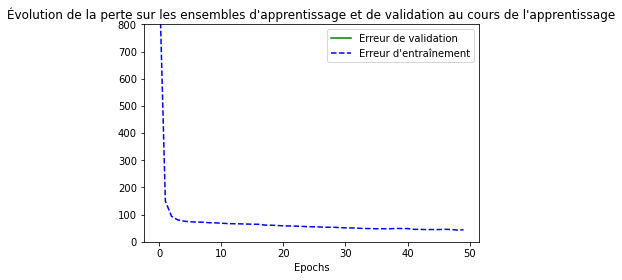

In [23]:
train_loss = (history.history['loss'])
plot_loss([], train_loss, ymax=800)

In [24]:
 model.evaluate(x_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 46.1175 - mae: 4.9155


[46.11746597290039, 4.915546894073486]

In [43]:
# %load solutions/correction.py
# Création d'un ensemble de validation
(x, y), (x_test, y_test) = boston_housing.load_data()
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=1/10, random_state=2)

# Activation linéaire sur la couche de sortie
model = Sequential()
model.add(Dense(4, activation='relu', input_dim=13))
model.add(Dense(1, activation='linear'))

optim = optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer=optim, loss='mse', metrics=['mae'])

# Calcul de l'erreur de validation au cours de l'optimisation
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50, batch_size=32)

Epoch 1/50
12/12 [==============================] - 1s 13ms/step - loss: 1064.0120 - mae: 25.4711 - val_loss: 537.7366 - val_mae: 20.8247
Epoch 2/50
12/12 [==============================] - 0s 3ms/step - loss: 423.6060 - mae: 17.5525 - val_loss: 352.1641 - val_mae: 16.6603
Epoch 3/50
12/12 [==============================] - 0s 3ms/step - loss: 282.0429 - mae: 14.0899 - val_loss: 237.1013 - val_mae: 13.5491
Epoch 4/50
12/12 [==============================] - 0s 3ms/step - loss: 198.2156 - mae: 11.4460 - val_loss: 182.6263 - val_mae: 11.4019
Epoch 5/50
12/12 [==============================] - 0s 3ms/step - loss: 166.1723 - mae: 10.3273 - val_loss: 157.9435 - val_mae: 10.3436
Epoch 6/50
12/12 [==============================] - 0s 3ms/step - loss: 145.7091 - mae: 9.5361 - val_loss: 143.4552 - val_mae: 9.7027
Epoch 7/50
12/12 [==============================] - 0s 3ms/step - loss: 132.9947 - mae: 8.9846 - val_loss: 132.3644 - val_mae: 9.0608
Epoch 8/50
12/12 [==============================] 

4/4 [==============================] - 0s 2ms/step - loss: 59.6006 - mae: 5.5545


[59.6005744934082, 5.55452299118042]

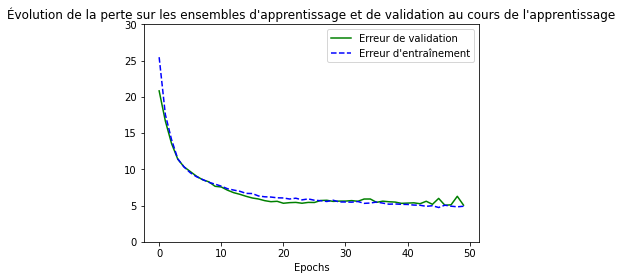

In [44]:
# %load solutions/evaluation.py
# Evaluation du modèle
train_loss=(history.history['mae'])
val_loss=(history.history['val_mae'])
plot_loss(val_loss, train_loss, ymax=30)

model.evaluate(x_test, y_test)

### Perceptron monocouche

Obtient-on des résultats comparables au réseau précédent avec un perceptron monocouche ?

In [47]:
## A COMPLETER ##
model = Sequential()
model.add(Dense(4,activation='linear',input_dim = 13))
opt = optimizers.Adam(learning_rate=1e-2)
model.compile(optimizer = opt, loss = 'mse', metrics = ['mae'])
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=50, batch_size=32)

Epoch 1/50
12/12 [==============================] - 0s 11ms/step - loss: 16555.9238 - mae: 94.8652 - val_loss: 10931.8242 - val_mae: 81.1308
Epoch 2/50
12/12 [==============================] - 0s 4ms/step - loss: 6384.2310 - mae: 60.2583 - val_loss: 4189.0615 - val_mae: 47.3830
Epoch 3/50
12/12 [==============================] - 0s 3ms/step - loss: 2307.2759 - mae: 33.9611 - val_loss: 2054.4241 - val_mae: 31.4788
Epoch 4/50
12/12 [==============================] - 0s 3ms/step - loss: 1243.0502 - mae: 24.2778 - val_loss: 1347.0865 - val_mae: 25.7091
Epoch 5/50
12/12 [==============================] - 0s 3ms/step - loss: 827.5451 - mae: 20.4225 - val_loss: 876.2612 - val_mae: 20.7867
Epoch 6/50
12/12 [==============================] - 0s 3ms/step - loss: 523.3228 - mae: 16.2832 - val_loss: 622.6569 - val_mae: 17.6700
Epoch 7/50
12/12 [==============================] - 0s 3ms/step - loss: 380.9107 - mae: 14.1547 - val_loss: 501.7580 - val_mae: 16.0549
Epoch 8/50
12/12 [===================

In [50]:
# %load solutions/monocouche.py
model = Sequential()
model.add(Dense(1, activation='linear', input_dim=13))

optim = optimizers.Adam(learning_rate = 0.01)
model.compile(optimizer=optim, loss='mse', metrics=['mae'])

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=16)

Epoch 1/100
23/23 [==============================] - 0s 6ms/step - loss: 13738.9102 - mae: 92.6044 - val_loss: 11521.0811 - val_mae: 91.9053
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 6428.8301 - mae: 62.7332 - val_loss: 5249.4678 - val_mae: 60.6212
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 2638.9280 - mae: 39.8629 - val_loss: 2120.1189 - val_mae: 38.2592
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 1007.9084 - mae: 24.9406 - val_loss: 908.7883 - val_mae: 24.8335
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 466.8606 - mae: 17.2444 - val_loss: 434.9849 - val_mae: 18.1816
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 266.6681 - mae: 13.1832 - val_loss: 264.9242 - val_mae: 14.3243
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 191.7062 - mae: 11.2618 - val_loss: 182.7970 - val_mae: 11.5207
Epoch 8/100
23/23 [=============

Epoch 62/100
23/23 [==============================] - 0s 2ms/step - loss: 38.3957 - mae: 4.6420 - val_loss: 42.5121 - val_mae: 4.8498
Epoch 63/100
23/23 [==============================] - 0s 2ms/step - loss: 35.9224 - mae: 4.5663 - val_loss: 41.0814 - val_mae: 4.1347
Epoch 64/100
23/23 [==============================] - 0s 2ms/step - loss: 36.0594 - mae: 4.5553 - val_loss: 41.3672 - val_mae: 4.0959
Epoch 65/100
23/23 [==============================] - 0s 2ms/step - loss: 36.9221 - mae: 4.5801 - val_loss: 41.3261 - val_mae: 4.0827
Epoch 66/100
23/23 [==============================] - 0s 2ms/step - loss: 35.7301 - mae: 4.5043 - val_loss: 41.2519 - val_mae: 4.0805
Epoch 67/100
23/23 [==============================] - 0s 2ms/step - loss: 39.9556 - mae: 4.7417 - val_loss: 42.7038 - val_mae: 4.8650
Epoch 68/100
23/23 [==============================] - 0s 2ms/step - loss: 38.0094 - mae: 4.5966 - val_loss: 41.0943 - val_mae: 4.6247
Epoch 69/100
23/23 [==============================] - 0s 2ms/s

4/4 [==============================] - 0s 2ms/step - loss: 69.9969 - mae: 6.3559


[69.99693298339844, 6.355916976928711]

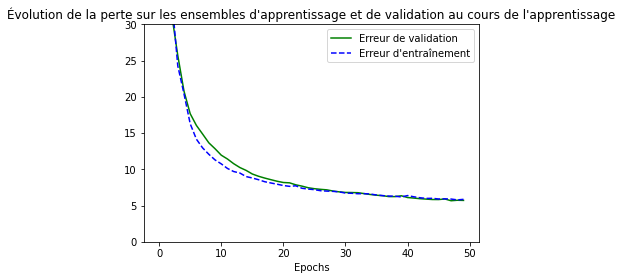

In [49]:
# Evaluation du modèle
train_loss=(history.history['mae'])
val_loss=(history.history['val_mae'])
plot_loss(val_loss, train_loss, ymax=30)

model.evaluate(x_test, y_test)

### Améliorations possibles

Avant de regarder les solutions proposées, prenez **vraiment** le temps de tester des architectures.

Epoch 1/100
23/23 [==============================] - 1s 8ms/step - loss: 578.8528 - mae: 22.2534 - val_loss: 589.9975 - val_mae: 22.1651
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 564.7277 - mae: 21.9067 - val_loss: 571.9574 - val_mae: 21.7159
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 538.9441 - mae: 21.2742 - val_loss: 538.4324 - val_mae: 20.8416
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 494.6877 - mae: 20.0793 - val_loss: 474.9208 - val_mae: 19.0401
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 407.3372 - mae: 17.6060 - val_loss: 370.2023 - val_mae: 16.0527
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 305.4489 - mae: 14.6288 - val_loss: 254.2713 - val_mae: 12.3971
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - loss: 202.7535 - mae: 11.3368 - val_loss: 182.7836 - val_mae: 10.0905
Epoch 8/100
23/23 [======================

Epoch 62/100
23/23 [==============================] - 0s 3ms/step - loss: 42.3148 - mae: 4.8286 - val_loss: 60.7025 - val_mae: 4.2561
Epoch 63/100
23/23 [==============================] - 0s 2ms/step - loss: 41.2361 - mae: 4.6050 - val_loss: 60.1250 - val_mae: 4.2015
Epoch 64/100
23/23 [==============================] - 0s 2ms/step - loss: 38.2443 - mae: 4.5842 - val_loss: 65.2760 - val_mae: 4.5819
Epoch 65/100
23/23 [==============================] - 0s 2ms/step - loss: 43.5991 - mae: 4.5855 - val_loss: 58.8043 - val_mae: 4.1634
Epoch 66/100
23/23 [==============================] - 0s 2ms/step - loss: 45.5718 - mae: 5.0015 - val_loss: 58.8125 - val_mae: 4.1734
Epoch 67/100
23/23 [==============================] - 0s 2ms/step - loss: 43.0610 - mae: 4.9007 - val_loss: 59.9991 - val_mae: 4.2327
Epoch 68/100
23/23 [==============================] - 0s 2ms/step - loss: 46.8753 - mae: 4.9020 - val_loss: 58.1497 - val_mae: 4.0915
Epoch 69/100
23/23 [==============================] - 0s 2ms/s

[27.24650001525879, 3.8321564197540283]

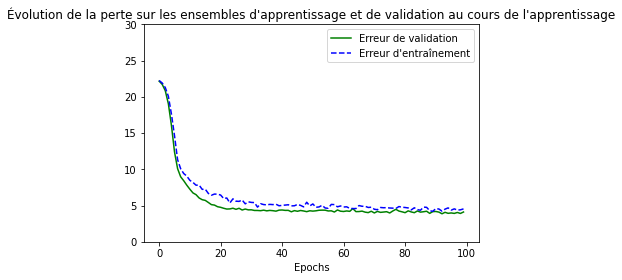

In [71]:
# Normalisation des entrées
x_mean = np.mean(x_train, axis = 0)
x_std = np.std(x_train, axis = 0)
x_train = (x_train-x_mean)/x_std
x_val = (x_val-x_mean)/x_std

x_mean_test = np.mean(x_test, axis = 0)
x_std_test = np.std(x_test, axis = 0)
x_test = (x_test - x_mean_test)/x_std_test

model = Sequential()
model.add(Dense(4,activation = 'relu',input_dim= 13))
model.add(Dropout(0.2))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'linear'))
optim = optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer=optim, loss='mse', metrics=['mae'])

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=16)

# Evaluation du modèle
train_loss=(history.history['mae'])
val_loss=(history.history['val_mae'])
plot_loss(val_loss, train_loss, ymax=30)

model.evaluate(x_test, y_test)

## Propositions d'améliorations

On peut certainement trouver de meilleures architectures !

### Amélioration n°1

In [53]:
%load solutions/amelioration_1.py

ValueError: 'solutions/amelioration_1.py' was not found in history, as a file, url, nor in the user namespace.

In [ ]:
# Evaluation du modèle
train_loss=(history.history['mae'])
val_loss=(history.history['val_mae'])
plot_loss(val_loss, train_loss, ymax=30)

model.evaluate(x_test, y_test)

### Amélioration n°2

In [54]:
%load solutions/amelioration_2.py

ValueError: 'solutions/amelioration_2.py' was not found in history, as a file, url, nor in the user namespace.

In [ ]:
# Evaluation du modèle
train_loss=(history.history['mae'])
val_loss=(history.history['val_mae'])
plot_loss(val_loss, train_loss, ymax=30)

model.evaluate(x_test, y_test)